<a href="https://colab.research.google.com/github/harshraj1512/Image-Autoencoder/blob/main/image_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# Normalize and reshape the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Define the autoencoder architecture
input_shape = (28, 28, 1)
latent_dim = 64

inputs = Input(shape=input_shape)
x = Flatten()(inputs)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
latent = Dense(latent_dim, activation='relu')(x)
x = Dense(128, activation='relu')(latent)
x = Dense(256, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)
outputs = Reshape(input_shape)(x)

autoencoder = Model(inputs, outputs)

In [ ]:
# Define the encoder model
encoder = Model(inputs, latent)

In [ ]:
# Define the decoder model
latent_inputs = Input(shape=(latent_dim,))
x = Dense(128, activation='relu')(latent_inputs)
x = Dense(256, activation='relu')(x)
x = Dense(784, activation='sigmoid')(x)
decoder_outputs = Reshape(input_shape)(x)

decoder = Model(latent_inputs, decoder_outputs)


In [ ]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.0223 - val_loss: 0.0119
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0102 - val_loss: 0.0085
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0080 - val_loss: 0.0071
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0069 - val_loss: 0.0065
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 10/10
1875/1875 [==============================] - 18s 10m

In [ ]:
# Encode an image
img = x_test[0]
latent_representation = encoder.predict(img.reshape(1, 28, 28, 1))


1/1 [==============================] - 0s 91ms/step


In [ ]:
# Decode the latent representation
reconstructed_img = decoder.predict(latent_representation)

1/1 [==============================] - 0s 65ms/step


Text(0.5, 1.0, 'Original Image')

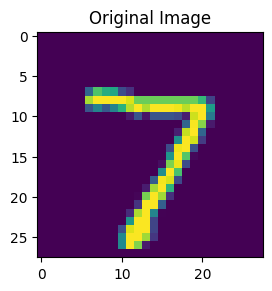

In [ ]:
# Print the original and reconstructed images
plt.subplot(1, 2, 1)
plt.imshow(img.reshape(28, 28))
plt.title('Original Image')

Text(0.5, 1.0, 'Reconstructed Image')

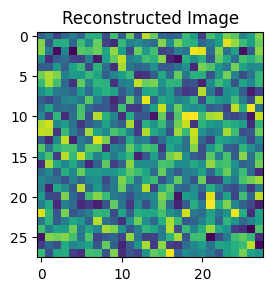

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img.reshape(28, 28))
plt.title('Reconstructed Image')

In [ ]:
plt.show()

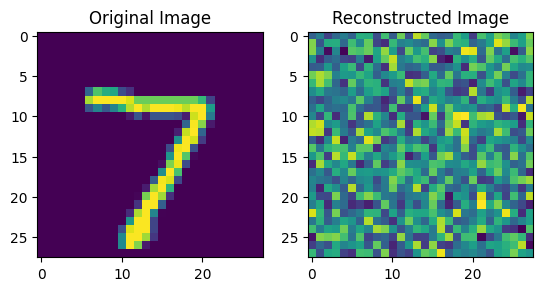

In [ ]:
# Print the original and reconstructed images
plt.subplot(1, 2, 1)
plt.imshow(img.reshape(28, 28))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img.reshape(28, 28))
plt.title('Reconstructed Image')

plt.show()